# Regularización y clasificación

## Objetvos
* Entender la conceptualización detrás de los algoritmos de regularización para ajuste de la regresión polinómica.
* Trabajar con regresión para datos atipicos a través de la regresión Robusta
* Introducir el conocimiento con respecto al aprendizaje no supervisado en clusterización con scikit learn.

## Regularización

Para poder seguir adelante con los ejemplos sobre la regularización retomaremos el ejemplo anterior de los datos que presentan el siguiente comportamiento:

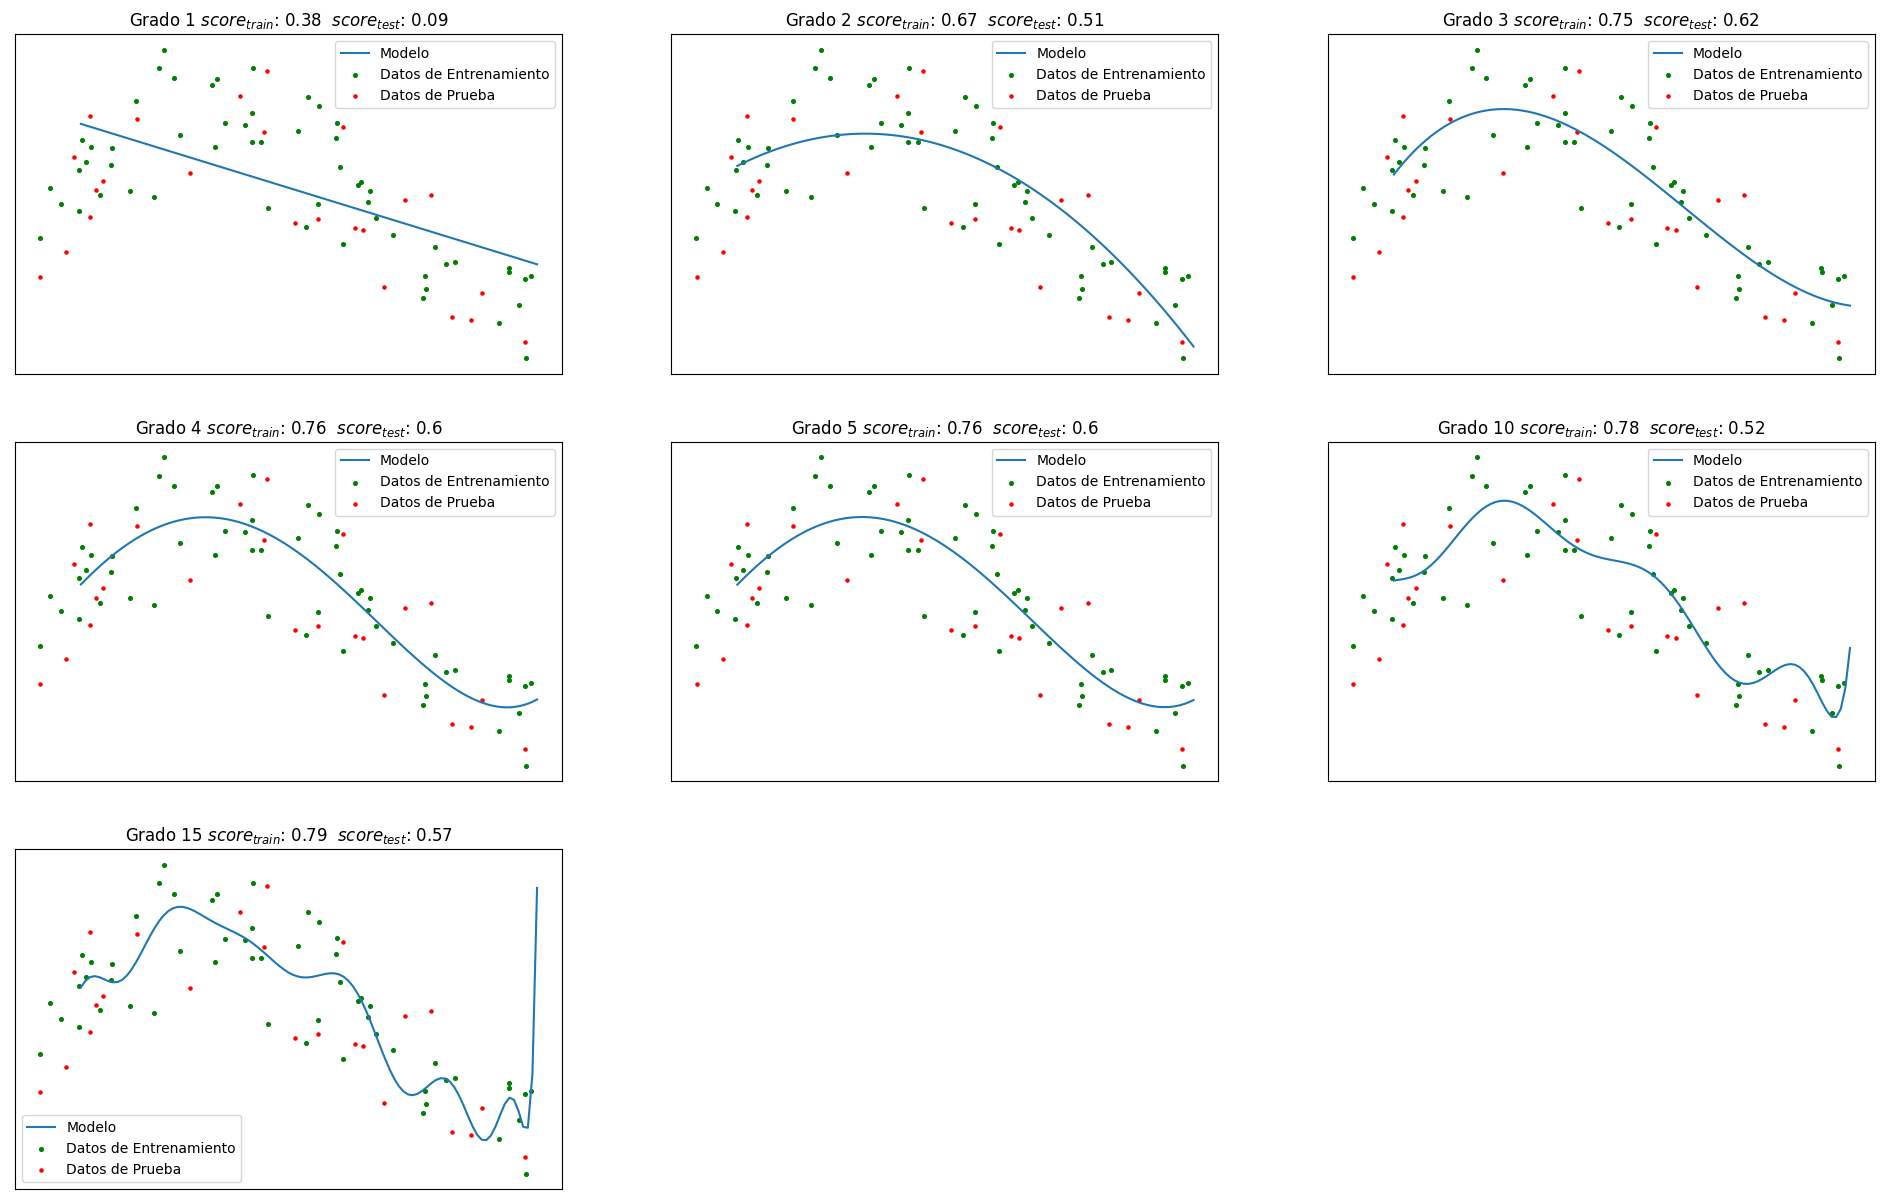

In [274]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# 1. Generar Datos Simulados
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.5, X.shape[0])

X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.3)
x_plot = np.linspace(0.5,5, 100)

# 2. Ajustar Modelos Polinómicos
degrees = [1,2,3,4,5,10,15]
plt.figure(figsize=(8*3, 5*math.ceil(len(degrees)/3)))

for i, degree in enumerate(degrees):

    ax = plt.subplot(math.ceil(len(degrees)/3),3,i+1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial = PolynomialFeatures(degree=degree)
    linear_regression = LinearRegression()
    pipeline = make_pipeline(polynomial, linear_regression)
    pipeline.fit(X_train, y_train)
    score_train = pipeline.score(X_train,y_train).round(2)

    score_test = pipeline.score(X_test,y_test).round(2)
    y_plot = pipeline.predict(x_plot[:, np.newaxis])
    plt.plot(x_plot, y_plot, label="Modelo")
    plt.scatter(X_train, y_train, s=7,c='g', label="Datos de Entrenamiento")
    plt.scatter(X_test, y_test, s=5,c='r', label="Datos de Prueba")
    # plt.xlim((0, 5))
    # plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(f"Grado {degree} $score_{{train}}$: {score_train}  $score_{{test}}$: {score_test}")

plt.show()


La regresión polinómica es una técnica de aprendizaje supervisado que se utiliza para modelar y analizar la relación entre una variable dependiente y una o más variables independientes mediante el ajuste de un polinomio. La regularización se introduce en este contexto para prevenir el sobreajuste, es decir, para evitar que el modelo se ajuste demasiado a los datos de entrenamiento y pierda capacidad de generalización.

La idea básica detrás de la regularización es añadir un término de penalización a la función de coste que el modelo está intentando minimizar. Este término de penalización castiga los valores grandes de los parámetros del modelo, lo que ayuda a prevenir que el modelo se ajuste demasiado a los datos de entrenamiento.

En el caso de la regresión polinómica, un modelo sin regularización podría ajustarse perfectamente a todos los puntos de datos de entrenamiento si se le permite tener un grado suficientemente alto. Sin embargo, este modelo probablemente tendría un rendimiento muy pobre en datos no vistos, porque ha aprendido a ajustarse a las peculiaridades de los datos de entrenamiento en lugar de aprender la relación subyacente entre las variables.

La regularización es una técnica utilizada en regresión y otros modelos de aprendizaje automático para prevenir el sobreajuste. El sobreajuste ocurre cuando un modelo es demasiado complejo y aprende a adaptarse perfectamente a los datos de entrenamiento, capturando incluso el ruido. Como resultado, el modelo puede tener un mal rendimiento en datos no vistos anteriormente (datos de prueba).

La regularización añade una penalización a la función de coste (o pérdida) del modelo, forzándolo a tener coeficientes de características (parámetros) más pequeños, lo que resulta en un modelo más simple y, por lo tanto, menos propenso al sobreajuste.

Hay varios métodos de regularización, pero los más comunes en el contexto de la regresión son:

1. **L1 Regularización (Lasso Regression)**: 
   - Penaliza la suma absoluta de los coeficientes.
   - Puede hacer que algunos coeficientes sean exactamente cero, lo que implica una selección automática de características.
   - Función de coste: $J(\theta) = \text{SSE} + \lambda \sum_{i=1}^n |\theta_i|$
   - Donde $\lambda$ es el parámetro de regularización y $\theta$ son los coeficientes del modelo.

2. **L2 Regularización (Ridge Regression)**:
   - Penaliza la suma de los cuadrados de los coeficientes.
   - Hace que los coeficientes sean pequeños pero no necesariamente cero.
   - Función de coste: $J(\theta) = \text{SSE} + \lambda \sum_{i=1}^n \theta_i^2$

3. **Regularización Elastic Net**:
   - Combina L1 y L2.
   - Puede ser útil si hay muchas características correlacionadas.
   - Función de coste: $J(\theta) = \text{SSE} + \lambda_1 \sum_{i=1}^n |\theta_i| + \lambda_2 \sum_{i=1}^n \theta_i^2$

El parámetro $\lambda$ (o los parámetros $\lambda_1$ y $\lambda_2$ en Elastic Net) es crucial: 

- Un $\lambda$ grande aumentará la penalización y dará como resultado un modelo más simple (posiblemente demasiado simple).
- Un $\lambda$ pequeño dará más libertad al modelo, acercándolo a una regresión lineal regular sin regularización.
- El valor óptimo de $\lambda$ generalmente se encuentra mediante validación cruzada.

En resumen, la regularización se utiliza para evitar el sobreajuste y para hacer que el modelo sea más generalizable a datos no vistos. La elección del tipo de regularización y del valor de $\lambda$ dependerá del problema y de los datos en cuestión.

### Lasso

La regresión Lasso es un tipo de regresión lineal que incluye una penalización en la función de coste. La penalización está basada en la norma L1 de los coeficientes, lo que lleva a una solución en la cual algunos de los coeficientes pueden ser exactamente cero. Esto significa que el modelo ignora algunas de las características predictoras, llevando a una forma implícita de selección de características.

Matemáticamente, el objetivo de la regresión Lasso es minimizar:

$$J(\beta) = \frac{1}{2m} \sum_{i=1}^m (h_\beta(x^{(i)}) - y^{(i)})^2 + \lambda \sum_{j=1}^n |\beta_j|$$

Donde:

- $m$ es el número de observaciones.
- $n$ es el número de características.
- $h_\beta(x)$ es la función de hipótesis (la predicción del modelo).
- $y^{(i)}$ es el valor real de la i-ésima observación.
- $\beta_j$ es el coeficiente de la j-ésima característica.
- $\lambda$ es el parámetro de regularización.

El primer término es simplemente la suma de los errores cuadrados (SSE, por sus siglas en inglés), que es lo que intentamos minimizar en la regresión lineal ordinaria. El segundo término es la penalización que busca reducir la magnitud de los coeficientes.

**Conceptualización:**

- **Selección de Características:** La mayor ventaja de Lasso sobre la regresión Ridge (que también utiliza regularización, pero basada en la norma L2) es que Lasso puede hacer que algunos coeficientes sean exactamente cero. Esto implica que ciertas características son completamente ignoradas por el modelo, lo que puede ser interpretado como una forma automática de selección de características. Esta propiedad puede ser especialmente útil si sospechamos que muchas características son irrelevantes o redundantes.
- **Prevención del Sobreajuste:** Al igual que otros métodos de regularización, Lasso previene el sobreajuste, especialmente cuando el número de características es mayor que el número de observaciones.
- **Interpretabilidad:** Debido a que Lasso puede hacer que algunos coeficientes sean cero, el modelo resultante puede ser más fácil de interpretar que un modelo con muchos coeficientes.
- **Elección de $\lambda$:** El parámetro de regularización $\lambda$ juega un papel crucial. Si $\lambda = 0$, Lasso es equivalente a la regresión lineal ordinaria. Si $\lambda$ es muy grande, todos los coeficientes pueden llegar a ser cero. La elección adecuada de $\lambda$ generalmente se hace mediante técnicas como la validación cruzada.
- **Unicidad y Continuidad:** A diferencia de la regresión Ridge, que siempre produce una única solución, Lasso puede tener múltiples soluciones en situaciones donde hay más características que observaciones. Además, no es garantía que la trayectoria de los coeficientes respecto a $\lambda$ sea continua.

En resumen, la regresión Lasso es un método poderoso tanto para la regularización como para la selección automática de características. Es útil en contextos donde los datos tienen muchas características y queremos un modelo más simple y fácil de interpretar.

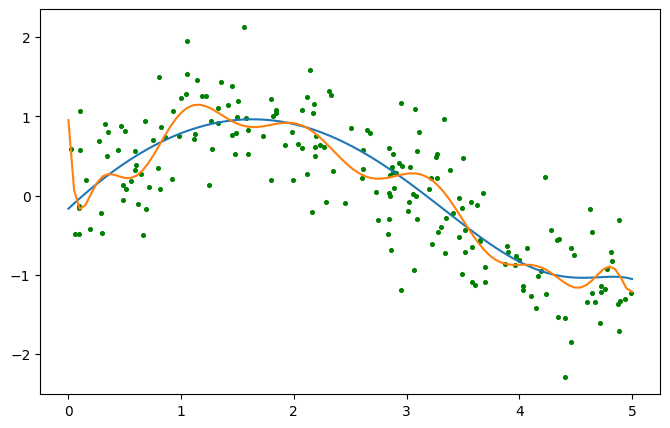

In [329]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import operator

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

import warnings 
warnings.filterwarnings("ignore")
x_range = 5
np.random.seed(0)
# Dividir los datos en conjuntos de entrenamiento y prueba
X = np.sort(5 * np.random.rand(200, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0,0.5, X.shape[0])
x_plot = np.linspace(0,x_range, 100,axis=0)
alpha =0
degree = 15

poly = PolynomialFeatures(degree=degree)

lass = Lasso(alpha = alpha,fit_intercept=False)
lin = LinearRegression()

X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)
x_plot_poly = poly.fit_transform(x_plot[:,np.newaxis])
lin.fit(X_train,y_train)
lass.fit(X_train,y_train)

y_plot = lass.predict(x_plot_poly)
y_plot2 = lin.predict(x_plot_poly)
plt.figure(figsize= (8,5))
plt.scatter(X,y, s = 7, c="g")
plt.plot(x_plot,y_plot)
plt.plot(x_plot,y_plot2)
plt.show()


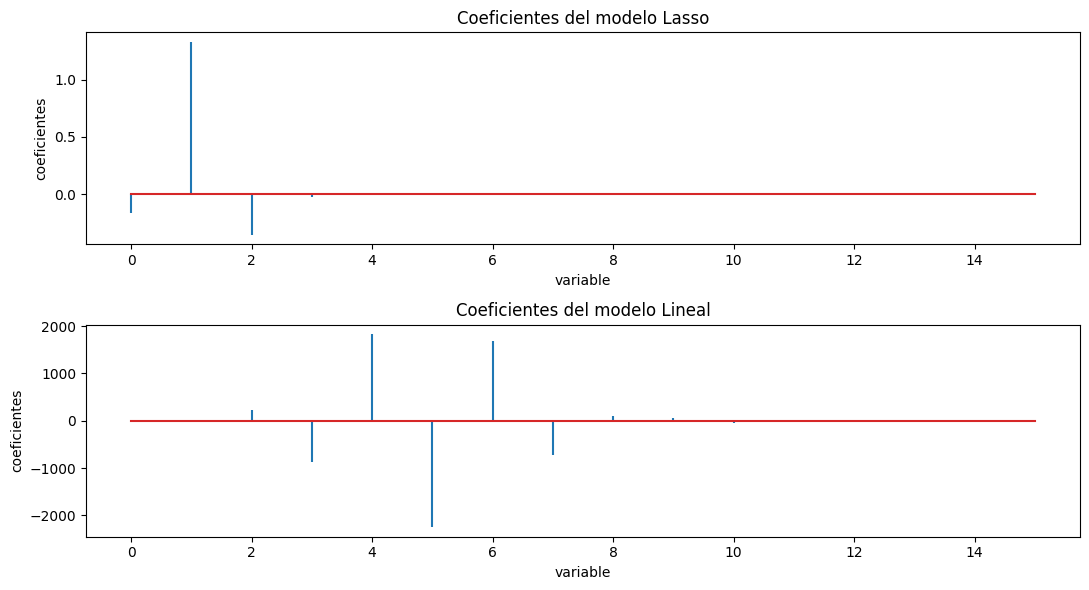

In [335]:
df_coeficientes = pd.DataFrame(
                        {'predictor': np.arange(0,degree+1),
                         'coef': lass.coef_.flatten()}
                  )

fig, ax = plt.subplots(2,figsize=(11, 6))
ax[0].stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
ax[1].stem(df_coeficientes.predictor, lin.coef_.flatten(), markerfmt=' ')
# plt.xticks(rotation=90, ha='right', size=5)
ax[0].set_xlabel('variable')
ax[0].set_ylabel('coeficientes')
ax[0].set_title('Coeficientes del modelo Lasso');
ax[1].set_xlabel('variable')
ax[1].set_ylabel('coeficientes')
ax[1].set_title('Coeficientes del modelo Lineal');
plt.tight_layout()

### Ridge

La regresión Ridge es una técnica de regularización para la regresión lineal que tiene como objetivo prevenir el sobreajuste y proporcionar una solución estable en casos donde los predictores están altamente correlacionados.

**Conceptualmente**:

1. **Sobreajuste**: Cuando ajustamos un modelo a datos, hay un riesgo de que el modelo se ajuste "demasiado bien" a esos datos, es decir, que aprenda no solo las relaciones subyacentes sino también el ruido o las variaciones aleatorias. Esto puede hacer que el modelo tenga un desempeño pobre en datos nuevos.
2. **Multicolinealidad**: En situaciones donde las variables independientes están altamente correlacionadas entre sí (multicolinealidad), las estimaciones de los coeficientes pueden volverse inestables y difíciles de interpretar.

La regresión Ridge aborda ambos problemas introduciendo una penalización sobre el tamaño de los coeficientes.

**Teóricamente**:

La regresión lineal simple se basa en minimizar la suma de los cuadrados de los residuos (RSS):

$$RSS = \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + ... + \beta_p x_{ip}))^2$$

Donde:

- $y_i$ es la observación real.
- $x_{i1}, x_{i2}, ..., x_{ip}$ son los valores de las variables predictoras para la i-ésima observación.
- $\beta_0, \beta_1, ..., \beta_p$ son los coeficientes de regresión.

En la regresión Ridge, en lugar de simplemente minimizar el RSS, minimizamos:

$$L(\beta) = RSS + \lambda \sum_{j=1}^{p} \beta_j^2$$

Donde:

- $\lambda$ es el parámetro de regularización, un valor no negativo. Cuanto mayor es $\lambda$, mayor es la penalización y, por lo tanto, los coeficientes se reducirán más.
- La suma recorre todos los coeficientes, penalizando su magnitud cuadrada.

**Aspectos clave**:

1. **Regularización**: La penalización $\lambda \sum_{j=1}^{p} \beta_j^2$ desalienta coeficientes grandes, lo que lleva a una solución más estable y generalizable.
2. **Parámetro de regularización $\lambda$**:
    - $\lambda = 0$: No hay penalización, y obtenemos la regresión lineal ordinaria.
    - $\lambda = \infty$: Los coeficientes serán cero porque la penalización domina la función de coste.
    - $0 < \lambda < \infty$: Los coeficientes estarán entre 0 y aquellos de la regresión lineal ordinaria.
3. **Selección de $\lambda$**: La elección adecuada de $\lambda$ es esencial y a menudo se encuentra mediante técnicas como la validación cruzada.
4. **Escalamiento**: Antes de aplicar Ridge, es común escalar (normalizar) las variables predictoras para que tengan media 0 y varianza 1. Esto garantiza que la penalización se aplica de manera uniforme a todos los coeficientes.

En resumen, la regresión Ridge es una extensión de la regresión lineal que introduce una penalización L2 en los coeficientes, lo que puede ayudar a evitar el sobreajuste y ofrecer soluciones más estables en presencia de multicolinealidad.

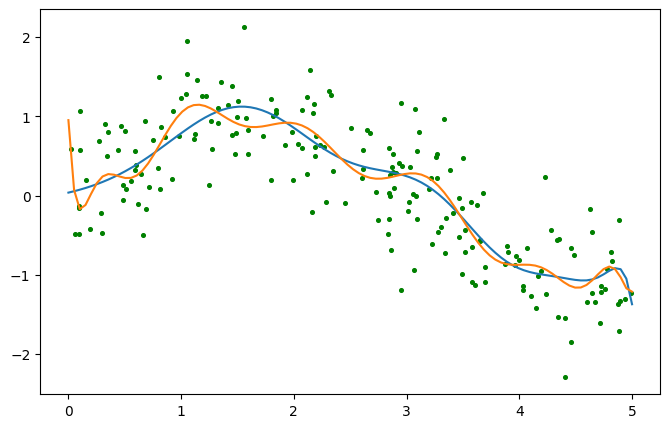

In [340]:
import warnings 
warnings.filterwarnings("ignore")
x_range = 5
np.random.seed(0)
# Dividir los datos en conjuntos de entrenamiento y prueba
X = np.sort(5 * np.random.rand(200, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0,0.5, X.shape[0])
x_plot = np.linspace(0,x_range, 100,axis=0)
alpha =2
degree = 15

poly = PolynomialFeatures(degree=degree)

ridg = Ridge(alpha = alpha)
lin = LinearRegression()

X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)
x_plot_poly = poly.fit_transform(x_plot[:,np.newaxis])
lin.fit(X_train,y_train)
ridg.fit(X_train,y_train)

y_plot = ridg.predict(x_plot_poly)
y_plot2 = lin.predict(x_plot_poly)
plt.figure(figsize= (8,5))
plt.scatter(X,y, s = 7, c="g")
plt.plot(x_plot,y_plot)
plt.plot(x_plot,y_plot2)
plt.show()

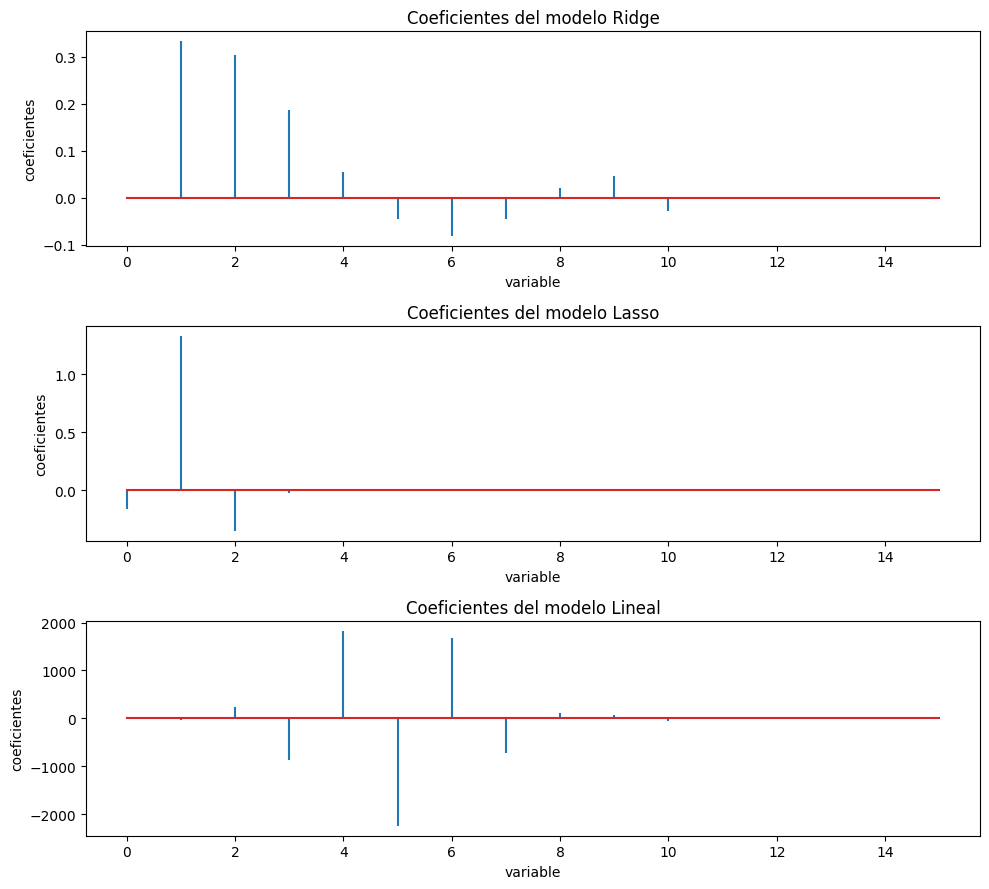

In [341]:
df_coeficientes = pd.DataFrame(
                        {'predictor': np.arange(0,degree+1),
})

fig, ax = plt.subplots(3,figsize=(10, 9))
ax[0].stem(df_coeficientes.predictor, ridg.coef_.flatten(), markerfmt=' ')
ax[1].stem(df_coeficientes.predictor, lass.coef_.flatten(), markerfmt=' ')
ax[2].stem(df_coeficientes.predictor, lin.coef_.flatten(), markerfmt=' ')
# plt.xticks(rotation=90, ha='right', size=5)
ax[0].set_xlabel('variable')
ax[0].set_ylabel('coeficientes')
ax[0].set_title('Coeficientes del modelo Ridge')
ax[1].set_xlabel('variable')
ax[1].set_ylabel('coeficientes')
ax[1].set_title('Coeficientes del modelo Lasso')
ax[2].set_xlabel('variable')
ax[2].set_ylabel('coeficientes')
ax[2].set_title('Coeficientes del modelo Lineal')
plt.tight_layout()

hagamos una comparativa entre Lasso (L1 regularización) y Ridge (L2 regularización) en cuanto a la regresión:

1. **Objetivo**:
    - **Lasso**: Minimizar la suma de los residuos al cuadrado añadiendo una penalización proporcional a la suma absoluta de los coeficientes.
    - **Ridge**: Minimizar la suma de los residuos al cuadrado añadiendo una penalización proporcional a la suma de los cuadrados de los coeficientes.
2. **Función de Coste**:
    - **Lasso**: $J(\beta) = \text{SSE} + \lambda \sum_{i=1}^n |\beta_i|$
    - **Ridge**: $J(\beta) = \text{SSE} + \lambda \sum_{i=1}^n \beta_i^2$
3. **Selección de Características**:
    - **Lasso**: Puede reducir algunos coeficientes a cero, esencialmente seleccionando un subconjunto de características. Es útil cuando se sospecha que muchas características son irrelevantes o redundantes.
    - **Ridge**: No eliminará ninguna característica del modelo, pero reducirá la magnitud de los coeficientes hacia cero, especialmente para características menos importantes.
4. **Solución**:
    - **Lasso**: Puede no tener una solución cerrada debido a su naturaleza no diferenciable en $\beta = 0$.
    - **Ridge**: Tiene una solución cerrada.
5. **Robustez frente a la colinealidad**:
    - **Lasso**: Puede ser sensible a la colinealidad entre las características. Si dos características son altamente colineales, Lasso podría seleccionar una de ellas de manera arbitraria.
    - **Ridge**: Es menos sensible a la colinealidad entre las características y distribuirá los coeficientes entre ellas.
6. **Parámetro de Regularización ($\lambda$)**:
    - Para ambos, un $\lambda$ de 0 resulta en una regresión lineal ordinaria sin regularización.
    - Un $\lambda$ grande en ambos modelos aumentará la penalización y simplificará el modelo.
7. **Cuándo usar**:
    - **Lasso**: Útil cuando se cree que muchas características son irrelevantes o redundantes.
    - **Ridge**: Útil cuando se cree que todas las características son relevantes o cuando se quiere proteger contra la colinealidad.
8. **Limitaciones**:
    - **Lasso**: Puede ser inestable en situaciones donde el número de características $p$ es mayor que el número de observaciones $n$ o cuando varias características están altamente correlacionadas.
    - **Ridge**: No reducirá ningún coeficiente a cero exactamente, lo que podría ser un problema si se sospecha que el modelo es demasiado complejo o tiene características irrelevantes.

Ambos métodos tienen sus ventajas y desventajas, y la elección entre ellos depende del problema específico y de las características de los datos. A menudo es útil probar ambos y comparar sus rendimientos. Además, la regularización Elastic Net, que combina características de Lasso y Ridge, puede ser una buena opción intermedia en muchos casos.

### Elastic Net



Elastic Net es una técnica de regularización que combina las penalizaciones de las regularizaciones L1 y L2, utilizadas en las regresiones Lasso y Ridge, respectivamente. Es especialmente útil cuando hay múltiples características correlacionadas. A continuación, se detalla el planteamiento teórico y conceptual de Elastic Net.

##### **1. Regresión Lineal: Un punto de partida**

Recordemos el modelo de regresión lineal:

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p + \epsilon$$

El objetivo es minimizar la suma de los errores cuadrados:

$$RSS = \sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij})^2$$

##### **2. Ridge (L2) y Lasso (L1) Regularizaciones**

- **Ridge (L2):** Agrega una penalización a la magnitud de los coeficientes. Esta penalización es la suma de los cuadrados de los coeficientes:

$$Penalización \ Ridge = \lambda \sum_{j=1}^{p} \beta_j^2$$

- **Lasso (L1):** También agrega una penalización, pero en lugar de los cuadrados de los coeficientes, utiliza el valor absoluto:

$$Penalización \ Lasso = \lambda \sum_{j=1}^{p} |\beta_j|$$

##### **3. Elastic Net**

Elastic Net combina las penalizaciones de Ridge y Lasso:

$$Penalización \ Elastic \ Net = \lambda ((1-\alpha) \sum_{j=1}^{p} \beta_j^2 + \alpha \sum_{j=1}^{p} |\beta_j|)$$

Aquí, $\alpha$ es un parámetro que varía entre 0 y 1:

- $\alpha = 0$: Elastic Net se convierte en Ridge.
- $\alpha = 1$: Elastic Net se convierte en Lasso.

El objetivo es minimizar:

$$RSS + \lambda ((1-\alpha) \sum_{j=1}^{p} \beta_j^2 + \alpha \sum_{j=1}^{p} |\beta_j|)$$

##### **Ventajas de Elastic Net**

1. **Características Correlacionadas:** En situaciones donde las características están altamente correlacionadas, Lasso tiende a seleccionar una de ellas al azar y descarta las demás. Elastic Net, al combinar las penalizaciones de Ridge y Lasso, tiende a incluir todas las características correlacionadas en el modelo.
2. **Regularización:** Al igual que Ridge y Lasso, Elastic Net también ayuda a prevenir el sobreajuste al agregar una penalización al modelo.

##### **Resumen**

Elastic Net es una técnica de regularización que combina las propiedades de Ridge y Lasso. Es útil en situaciones donde las características están altamente correlacionadas, proporcionando un equilibrio entre la selección de características (como Lasso) y la penalización de coeficientes (como Ridge). La elección de $\alpha$ determinará cuánto peso se da a cada tipo de penalización.

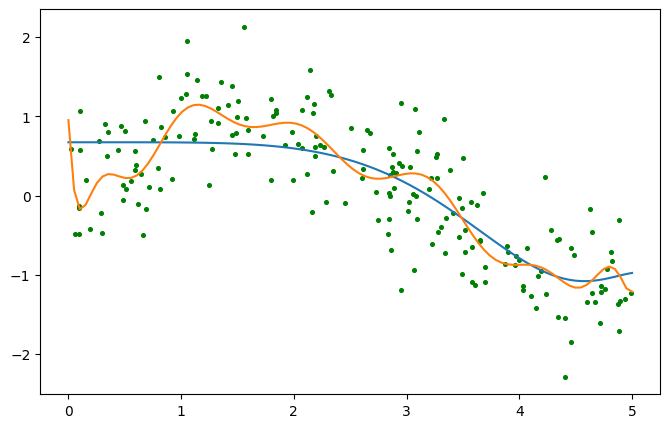

In [347]:
x_range = 5
np.random.seed(0)
# Dividir los datos en conjuntos de entrenamiento y prueba
X = np.sort(5 * np.random.rand(200, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0,0.5, X.shape[0])
x_plot = np.linspace(0,x_range, 100,axis=0)
alpha =0.5
degree = 15

poly = PolynomialFeatures(degree=degree)

elstnt = ElasticNet(alpha = alpha)
lin = LinearRegression()

X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)
x_plot_poly = poly.fit_transform(x_plot[:,np.newaxis])
lin.fit(X_train,y_train)
elstnt.fit(X_train,y_train)

y_plot = elstnt.predict(x_plot_poly)
y_plot2 = lin.predict(x_plot_poly)
plt.figure(figsize= (8,5))
plt.scatter(X,y, s = 7, c="g")
plt.plot(x_plot,y_plot)
plt.plot(x_plot,y_plot2)
plt.show()

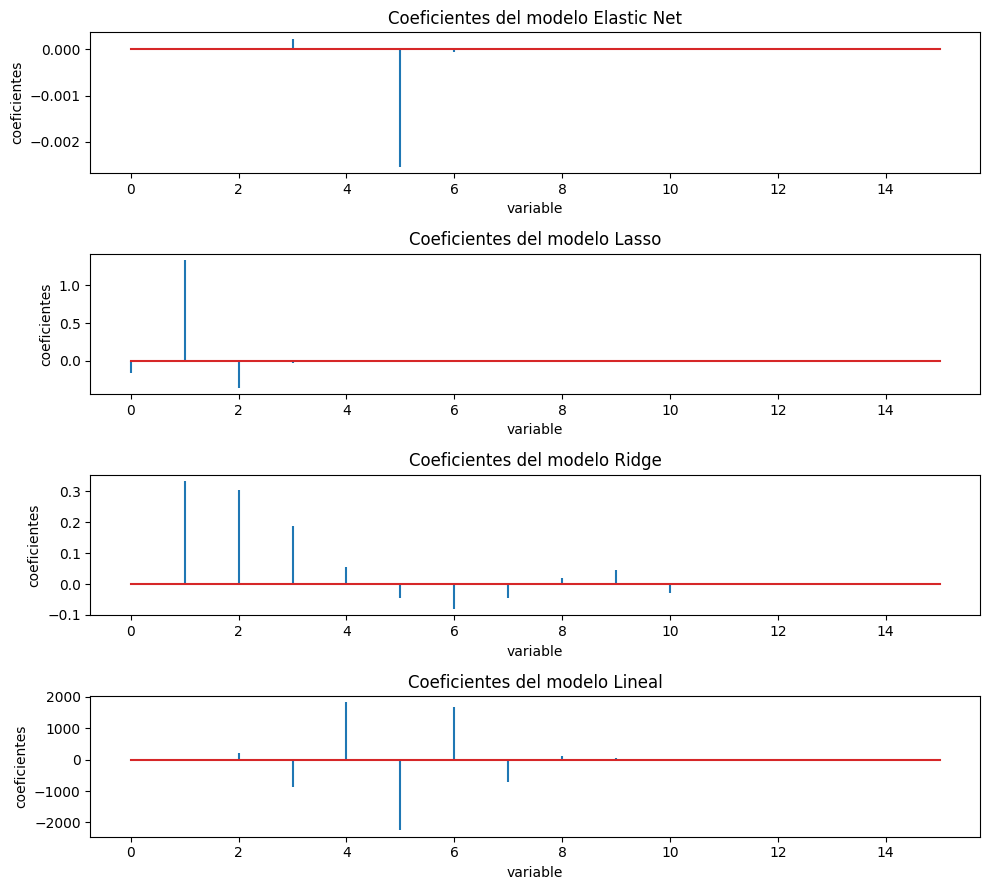

In [348]:
df_coeficientes = pd.DataFrame(
                        {'predictor': np.arange(0,degree+1),
})

fig, ax = plt.subplots(4,figsize=(10, 9))
ax[0].stem(df_coeficientes.predictor, elstnt.coef_.flatten(), markerfmt=' ')
ax[1].stem(df_coeficientes.predictor, lass.coef_.flatten(), markerfmt=' ')
ax[2].stem(df_coeficientes.predictor, ridg.coef_.flatten(), markerfmt=' ')
ax[3].stem(df_coeficientes.predictor, lin.coef_.flatten(), markerfmt=' ')
# plt.xticks(rotation=90, ha='right', size=5)
ax[0].set_xlabel('variable')
ax[0].set_ylabel('coeficientes')
ax[0].set_title('Coeficientes del modelo Elastic Net')
ax[1].set_xlabel('variable')
ax[1].set_ylabel('coeficientes')
ax[1].set_title('Coeficientes del modelo Lasso')
ax[2].set_xlabel('variable')
ax[2].set_ylabel('coeficientes')
ax[2].set_title('Coeficientes del modelo Ridge')
ax[3].set_xlabel('variable')
ax[3].set_ylabel('coeficientes')
ax[3].set_title('Coeficientes del modelo Lineal')
plt.tight_layout()

## Regresión Robusta

La regresión robusta tiene como objetivo ajustar un modelo de regresión en presencia de datos corruptos: ya sean valores atípicos o errores en el modelo.

Automatically created module for IPython interactive environment


Text(0.5, 1.0, 'Corrupt y')

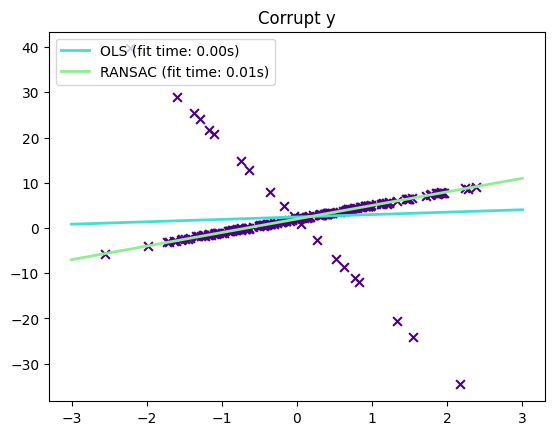

In [352]:

import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, TheilSenRegressor
from sklearn.linear_model import RANSACRegressor

print(__doc__)

estimators = [('OLS', LinearRegression()),

              ('RANSAC', RANSACRegressor(random_state=42)), ]
colors = {'OLS': 'turquoise', 'RANSAC': 'lightgreen'}
lw = 2

# #############################################################################
# Outliers only in the y direction

np.random.seed(0)
n_samples = 200
# Linear model y = 3*x + N(2, 0.1**2)
x = np.random.randn(n_samples)
w = 3.
c = 2.
noise = 0.1 * np.random.randn(n_samples)
y = w * x + c + noise
# 10% outliers
y[-20:] += -20 * x[-20:]
X = x[:, np.newaxis]

plt.scatter(x, y, color='indigo', marker='x', s=40)
line_x = np.array([-3, 3])
for name, estimator in estimators:
    t0 = time.time()
    estimator.fit(X, y)
    elapsed_time = time.time() - t0
    y_pred = estimator.predict(line_x.reshape(2, 1))
    plt.plot(line_x, y_pred, color=colors[name], linewidth=lw,
             label='%s (fit time: %.2fs)' % (name, elapsed_time))

plt.axis('tight')
plt.legend(loc='upper left')
plt.title("Corrupt y")


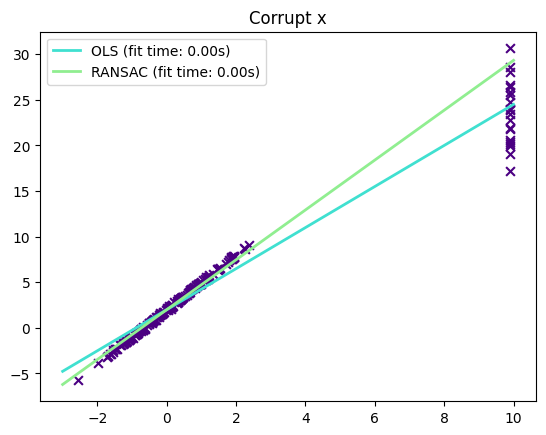

In [353]:
np.random.seed(0)
# Linear model y = 3*x + N(2, 0.1**2)
x = np.random.randn(n_samples)
noise = 0.1 * np.random.randn(n_samples)
y = 3 * x + 2 + noise
# 10% outliers
x[-20:] = 9.9
y[-20:] += 22
X = x[:, np.newaxis]

plt.figure()
plt.scatter(x, y, color='indigo', marker='x', s=40)

line_x = np.array([-3, 10])
for name, estimator in estimators:
    t0 = time.time()
    estimator.fit(X, y)
    elapsed_time = time.time() - t0
    y_pred = estimator.predict(line_x.reshape(2, 1))
    plt.plot(line_x, y_pred, color=colors[name], linewidth=lw,
             label='%s (fit time: %.2fs)' % (name, elapsed_time))

plt.axis('tight')
plt.legend(loc='upper left')
plt.title("Corrupt x")
plt.show()

Algunos conceptos clave que debemos tener en cuenta cuando se trat con datos corruptos son los siguientes:

#### Valors atípicos en x o en y

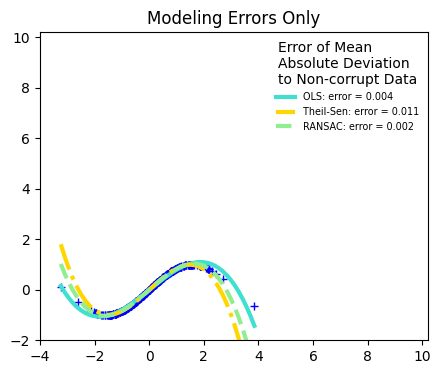

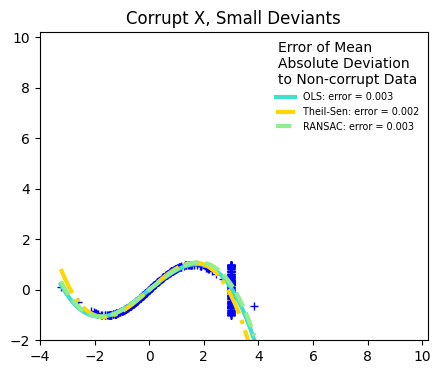

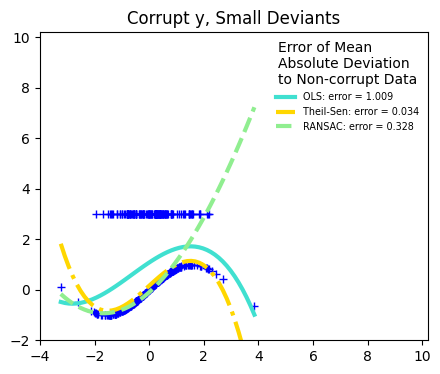

In [358]:
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import (
    LinearRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor)
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

np.random.seed(42)

X = np.random.normal(size=400)
y = np.sin(X)
# Make sure that it X is 2D
X = X[:, np.newaxis]

X_test = np.random.normal(size=200)
y_test = np.sin(X_test)
X_test = X_test[:, np.newaxis]

y_errors = y.copy()
y_errors[::3] = 3

X_errors = X.copy()
X_errors[::3] = 3

y_errors_large = y.copy()
y_errors_large[::3] = 10

X_errors_large = X.copy()
X_errors_large[::3] = 10

estimators = [('OLS', LinearRegression()),
              ('Theil-Sen', TheilSenRegressor(random_state=42)),
              ('RANSAC', RANSACRegressor(random_state=42)),
]
colors = {'OLS': 'turquoise', 'Theil-Sen': 'gold', 'RANSAC': 'lightgreen', 'HuberRegressor': 'black'}
linestyle = {'OLS': '-', 'Theil-Sen': '-.', 'RANSAC': '--', 'HuberRegressor': '--'}
lw = 3

x_plot = np.linspace(X.min(), X.max())
for title, this_X, this_y in [
        ('Modeling Errors Only', X, y),
        ('Corrupt X, Small Deviants', X_errors, y),
        ('Corrupt y, Small Deviants', X, y_errors),
        ]:
    plt.figure(figsize=(5, 4))
    plt.plot(this_X[:, 0], this_y, 'b+')

    for name, estimator in estimators:
        model = make_pipeline(PolynomialFeatures(3), estimator)
        model.fit(this_X, this_y)
        mse = mean_squared_error(model.predict(X_test), y_test)
        y_plot = model.predict(x_plot[:, np.newaxis])
        plt.plot(x_plot, y_plot, color=colors[name], linestyle=linestyle[name],
                 linewidth=lw, label='%s: error = %.3f' % (name, mse))

    legend_title = 'Error of Mean\nAbsolute Deviation\nto Non-corrupt Data'
    legend = plt.legend(loc='upper right', frameon=False, title=legend_title,
                        prop=dict(size='x-small'))
    plt.xlim(-4, 10.2)
    plt.ylim(-2, 10.2)
    plt.title(title)
plt.show()

#### Fracción de valores atípicos

El número de puntos atípicos es importante pero también lo son sus magnitudes

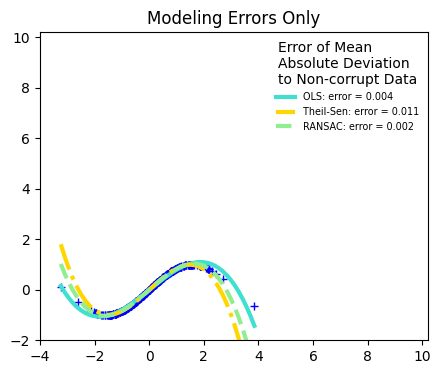

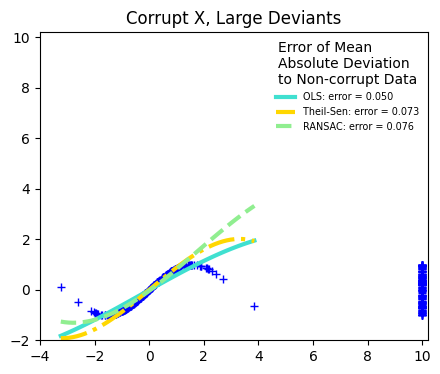

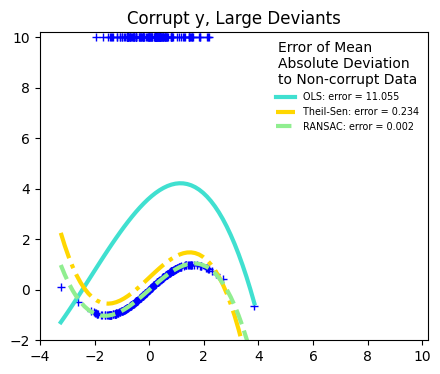

In [359]:

for title, this_X, this_y in [
        ('Modeling Errors Only', X, y),
        ('Corrupt X, Large Deviants', X_errors_large, y),
        ('Corrupt y, Large Deviants', X, y_errors_large)
        ]:
    plt.figure(figsize=(5, 4))
    plt.plot(this_X[:, 0], this_y, 'b+')

    for name, estimator in estimators:
        model = make_pipeline(PolynomialFeatures(3), estimator)
        model.fit(this_X, this_y)
        mse = mean_squared_error(model.predict(X_test), y_test)
        y_plot = model.predict(x_plot[:, np.newaxis])
        plt.plot(x_plot, y_plot, color=colors[name], linestyle=linestyle[name],
                 linewidth=lw, label='%s: error = %.3f' % (name, mse))

    legend_title = 'Error of Mean\nAbsolute Deviation\nto Non-corrupt Data'
    legend = plt.legend(loc='upper right', frameon=False, title=legend_title,
                        prop=dict(size='x-small'))
    plt.xlim(-4, 10.2)
    plt.ylim(-2, 10.2)
    plt.title(title)
plt.show()

### RANSAC: Consenso RANdom SAmple
RANSAC (RANdom SAmple Consensus) ajusta un modelo a partir de subconjuntos aleatorios de valores típicos del conjunto completo de datos.

RANSAC es un algoritmo no determinista que sólo produce un resultado razonable con una cierta probabilidad, que depende del número de iteraciones (ver el parámetro max_trials). Se suele utilizar para problemas de regresión lineal y no lineal y es especialmente popular en el campo de la visión fotogramétrica por computadora.

El algoritmo divide los datos completos de la muestra de entrada en un conjunto de valores típicos, que pueden estar sujetos a ruido, y valores atípicos, que están causados, por ejemplo, por mediciones erróneas o hipótesis no válidas sobre los datos. A continuación, el modelo resultante se estima sólo a partir de los valores típicos determinados.



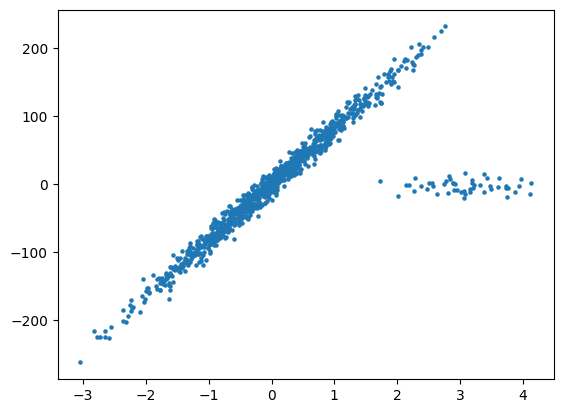

In [362]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import linear_model, datasets


n_samples = 1000
n_outliers = 50


X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)
plt.scatter(X,y,s = 5)

Estimated coefficients (true, linear regression, RANSAC):
82.1903908407869 [54.17236387] [81.63462406]


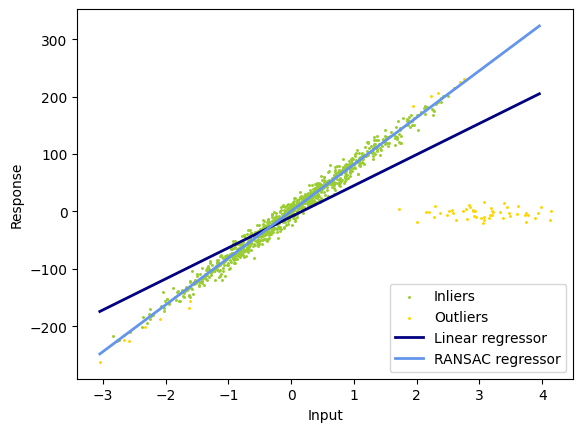

In [364]:

# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

# Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, lr.coef_, ransac.estimator_.coef_)

lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.',
            label='Inliers',s = 5)
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
            label='Outliers',s = 5)
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw,
         label='RANSAC regressor')
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

#### Detalles
Cada iteración realiza los siguientes pasos:

Seleccionar muestras aleatorias `min_samples` de los datos originales y comprobar si el conjunto de datos es válido (ver `is_data_valid`).

Ajustar un modelo al subconjunto aleatorio (`base_estimator.fit`) y comprobar si el modelo estimado es válido (ver `is_model_valid`).

Clasificar todos los datos como valores típicos o valores atípicos calculando los residuos del modelo estimado (`base_estimator.predict(X) - y`) - todas las muestras de datos con residuos absolutos menores que el `residual_threshold` se consideran valores atipicos.

Guarda el modelo ajustado como el mejor modelo si el número de muestras de valores típicos es máximo. En caso de que el modelo estimado actual tenga el mismo número de valores típicos, sólo se considera como el mejor modelo si tiene mejor puntuación.

Estos pasos se realizan un número máximo de veces (`max_trials`) o hasta que se cumpla uno de los criterios especiales de parada (ver `stop_n_inliers` y `stop_score`). El modelo final se estima utilizando todas las muestras de valores típicos (conjunto de consenso) del mejor modelo determinado previamente.

Las funciones `is_data_valid` y `is_model_valid` permiten identificar y rechazar combinaciones degeneradas de submuestras aleatorias. Si no se necesita el modelo estimado para identificar los casos degenerados, debería utilizarse is_data_valid, ya que se llama antes de ajustar el modelo y, por tanto, se obtiene un mejor rendimiento computacional.



### Estimador Theil-Sen:
El estimador TheilSenRegressor utiliza una generalización de la mediana en múltiples dimensiones. Por lo tanto, es robusto a los valores atípicos multivariados. Sin embargo, la robustez del estimador disminuye rápidamente con la dimensionalidad del problema. Pierde sus propiedades de robustez y no es mejor que un mínimo cuadrado ordinario en una dimensión alta.



TheilSenRegressor es comparable al Mínimos cuadrados ordinarios (OLS) en términos de eficiencia asintótica y como estimador insesgado. En contraste con OLS, Theil-Sen es un método no paramétrico, lo que significa que no hace ninguna suposición sobre la distribución subyacente de los datos. Dado que Theil-Sen es un estimador basado en la mediana, es más robusto frente a los datos corruptos y los valores atípicos. En un entorno univariante, Theil-Sen tiene un punto de ruptura de aproximadamente el 29,3% en el caso de una regresión lineal simple, lo que significa que puede tolerar datos corruptos arbitrarios de hasta el 29,3%.

La estimación del modelo se realiza calculando las pendientes y los interceptos de una subpoblación de todas las combinaciones posibles de p puntos de submuestra. Si se ajusta un intercepto, p debe ser mayor o igual que n_features + 1. La pendiente y el intercepto finales se definen entonces como la mediana espacial de estas pendientes e interceptos.

En algunos casos, Theil-Sen funciona mejor que RANSAC, que también es un método robusto. Esto se ilustra en el segundo ejemplo siguiente, en el que los valores atípicos con respecto al eje x perturban a RANSAC. El ajuste del parámetro residual_threshold de RANSAC lo remedia, pero en general se necesita un conocimiento a priori sobre los datos y la naturaleza de los valores atípicos. Debido a la complejidad computacional de Theil-Sen, se recomienda utilizarlo sólo para problemas pequeños en términos de número de muestras y características. Para problemas más grandes, el parámetro max_subpopulation restringe la magnitud de todas las combinaciones posibles de p puntos de submuestra a un subconjunto elegido al azar y, por tanto, también limita el tiempo de ejecución. Por lo tanto, Theil-Sen es aplicable a problemas más grandes con el inconveniente de perder algunas de sus propiedades matemáticas, ya que entonces trabaja sobre un subconjunto aleatorio.

Automatically created module for IPython interactive environment


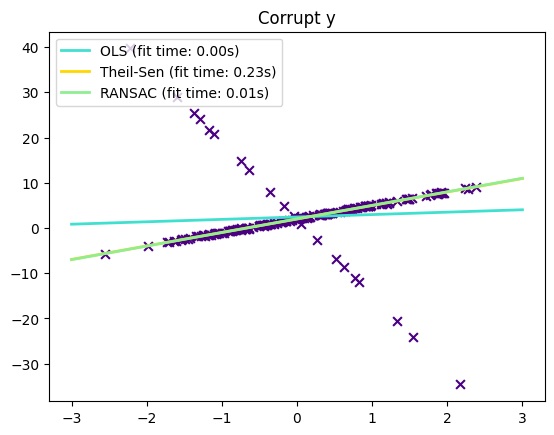

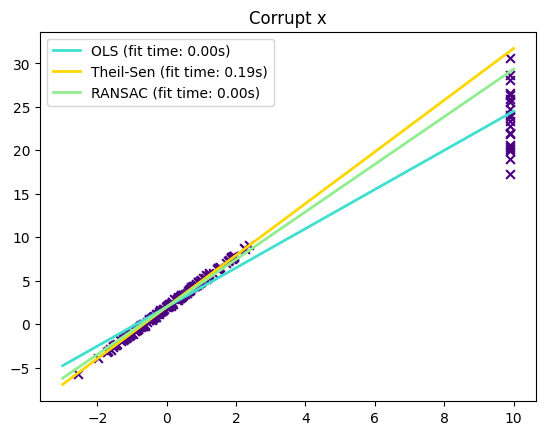

In [365]:
# Author: Florian Wilhelm -- <florian.wilhelm@gmail.com>
# License: BSD 3 clause

import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, TheilSenRegressor
from sklearn.linear_model import RANSACRegressor

print(__doc__)

estimators = [('OLS', LinearRegression()),
              ('Theil-Sen', TheilSenRegressor(random_state=42)),
              ('RANSAC', RANSACRegressor(random_state=42)), ]
colors = {'OLS': 'turquoise', 'Theil-Sen': 'gold', 'RANSAC': 'lightgreen'}
lw = 2

# #############################################################################
# Outliers only in the y direction

np.random.seed(0)
n_samples = 200
# Linear model y = 3*x + N(2, 0.1**2)
x = np.random.randn(n_samples)
w = 3.
c = 2.
noise = 0.1 * np.random.randn(n_samples)
y = w * x + c + noise
# 10% outliers
y[-20:] += -20 * x[-20:]
X = x[:, np.newaxis]

plt.scatter(x, y, color='indigo', marker='x', s=40)
line_x = np.array([-3, 3])
for name, estimator in estimators:
    t0 = time.time()
    estimator.fit(X, y)
    elapsed_time = time.time() - t0
    y_pred = estimator.predict(line_x.reshape(2, 1))
    plt.plot(line_x, y_pred, color=colors[name], linewidth=lw,
             label='%s (fit time: %.2fs)' % (name, elapsed_time))

plt.axis('tight')
plt.legend(loc='upper left')
plt.title("Corrupt y")

# #############################################################################
# Outliers in the X direction

np.random.seed(0)
# Linear model y = 3*x + N(2, 0.1**2)
x = np.random.randn(n_samples)
noise = 0.1 * np.random.randn(n_samples)
y = 3 * x + 2 + noise
# 10% outliers
x[-20:] = 9.9
y[-20:] += 22
X = x[:, np.newaxis]

plt.figure()
plt.scatter(x, y, color='indigo', marker='x', s=40)

line_x = np.array([-3, 10])
for name, estimator in estimators:
    t0 = time.time()
    estimator.fit(X, y)
    elapsed_time = time.time() - t0
    y_pred = estimator.predict(line_x.reshape(2, 1))
    plt.plot(line_x, y_pred, color=colors[name], linewidth=lw,
             label='%s (fit time: %.2fs)' % (name, elapsed_time))

plt.axis('tight')
plt.legend(loc='upper left')
plt.title("Corrupt x")
plt.show()

La implementación de TheilSenRegressor en scikit-learn sigue una generalización a un modelo de regresión lineal multivariante utilizando la mediana espacial que es una generalización de la mediana a múltiples dimensiones términos de complejidad temporal y espacial, Theil-Sen escala según:
$$\begin{pmatrix}n_{samples}\\n_{subsamples}\end{pmatrix}$$

lo que hace inviable su aplicación exhaustiva a problemas con un gran número de muestras y características. Por lo tanto, la magnitud de una subpoblación puede elegirse para limitar la complejidad temporal y espacial considerando sólo un subconjunto aleatorio de todas las combinaciones posibles

## Algoritmos de clustering


### K-means


El algoritmo KMeans agrupa los datos tratando de separar muestras en n grupos de igual varianza, minimizando un criterio conocido como la inercia o la suma de cuadrados dentro del conglomerado (ver abajo). Este algoritmo requiere que se especifique el número de conglomerados. Se ajusta bien a un gran número de muestras y se ha utilizado en una una gran variedad de áreas de aplicación en muchos campos diferentes.

El algoritmo k-medias divide un conjunto $N$ de $X$ muestras en $K$ conglomerados disjuntos $C$, cada uno descrito por la media $\mu_j$ de las muestras en el conglomerado. Las medias se denominan comúnmente los «centroides» del conglomerado; nótese que no son, en general, puntos de $X$, aunque viven en el mismo espacio.

El algoritmo K-medias tiene como objetivo elegir los centroides que minimicen la **inercia**, o el **criterio de la suma de cuadrados dentro del conglomerado**:

$$\sum_{i = 0}^{n}{\min_{\mu_j\in C}{(||x_i-\mu_j||^2)}}$$

La inercia puede reconocerse como una medida de la coherencia interna de los conglomerados. Sufre varios inconvenientes:

* La inercia supone que los conglomerados son convexos e isotrópicos, lo que no siempre es el caso. Responde mal a los conglomerados alargados o a las variedades con formas irregulares.

* La inercia no es una métrica normalizada: sólo sabemos que los valores más bajos son mejores y cero es óptimo. Pero en espacios de muy alta dimensión, las distancias Euclidianas tienden a inflarse (este es un ejemplo de la llamada «maldición de la dimensión»). Ejecutar un algoritmo de reducción de dimensionalidad como Análisis de componentes principales (PCA) antes de un análisis de conglomerados mediante k-medias puede minimizar este problema y acelerar los cálculos.

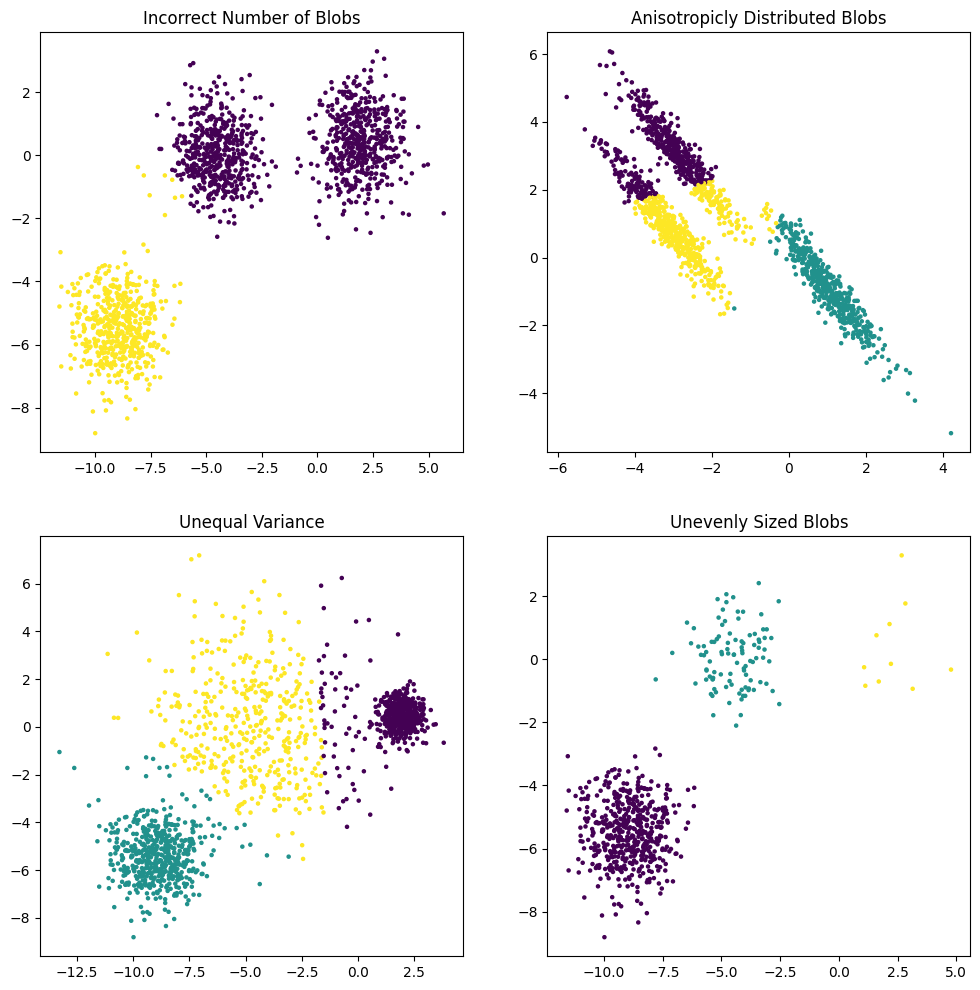

In [368]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred,s = 5)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred,s = 5)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred,s = 5)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred,s = 5)
plt.title("Unevenly Sized Blobs")

plt.show()

Este ejemplo pretende ilustrar situaciones en las que k-medias producirá conglomerados poco intuitivos y posiblemente inesperados. En los tres primeros gráficos, los datos de entrada no se ajustan a alguna suposición implícita de k-medias y, como resultado, se producen clusters no deseados. En el último gráfico, k-medias produce conglomerados intuitivos a pesar de las manchas o regiones (blobs) de tamaño desigual.

K-medias se conoce a menudo como el algoritmo de Lloyd. En términos básicos, el algoritmo tiene tres pasos. El primer paso elige los centroides iniciales, siendo el método más básico elegir $k$ muestras del conjunto de datos $X$. Después de la inicialización, K-medias consiste en un bucle entre los otros dos pasos. El primer paso asigna cada muestra a su centroide más cercano. El segundo paso crea nuevos centroides tomando el valor medio de todas las muestras asignadas a cada centroide anterior. Se calcula la diferencia entre los centroides antiguos y los nuevos y el algoritmo repite estos dos últimos pasos hasta que este valor sea menor que un umbral. En otras palabras, se repite hasta que los centroides no se muevan de forma significativa.

K-medias es equivalente al algoritmo de maximización de la esperanza con una matriz de covarianzas pequeña, toda igual y diagonal.



In [369]:
import numpy as np
from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(
    f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}"
)

# digits: 10; # samples: 1797; # features 64


In [372]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(data, estimator[-1].labels_,
                                 metric="euclidean", sample_size=300,)
    ]

    # Show the results
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

In [384]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4,
                random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans2, name="random", data=data, labels=labels)

pca = PCA(n_components=n_digits).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans3, name="PCA-based", data=data, labels=labels)

print(82 * '_')

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	1.238s	69662	0.680	0.719	0.699	0.570	0.695	0.181
random   	0.247s	69707	0.675	0.716	0.694	0.560	0.691	0.179
PCA-based	0.183s	72686	0.636	0.658	0.647	0.521	0.643	0.135
__________________________________________________________________________________


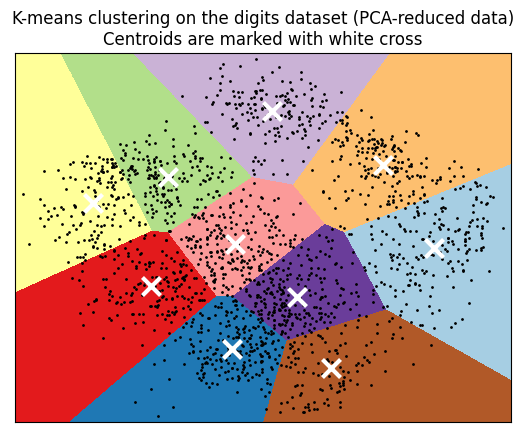

In [387]:
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()




#### K-means mini-batch
El `MiniBatchKMeans` es una variante del algoritmo `KMeans` que usa mini lotes para reducir el tiempo de cálculo, mientras se intenta optimizar la misma función objetivo. Los mini lotes son subconjuntos de los datos de entrada, muestreados aleatoriamente en cada iteración de entrenamiento. Estos mini lotes reducen drásticamente la cantidad de cálculo necesaria para converger a una solución local. En contraste con otros algoritmos que reducen el tiempo de convergencia de k-medias, k-medias en mini lotes produce resultados que generalmente son ligeramente peores que el algoritmo estándar.

El algoritmo itera entre dos pasos principales, similares a las k-medias vanilla. En el primer paso, las $b$ muestras se extraen aleatoriamente del conjunto de datos, para formar un mini lote. Estos se asignan al centroide más cercano. En el segundo paso, se actualizan los centroides. En contraste con las k-medias, esto se hace sobre una base por muestra. Para cada muestra en el mini lote, el centroide asignado se actualiza tomando la media de transmisión de la muestra y todas las muestras anteriores asignadas a ese centroide. Esto tiene el efecto de disminuir la tasa de cambio de un centroide en el tiempo. Estos pasos se realizan hasta que se alcanza la convergencia o un número predeterminado de iteraciones.

MiniBatchKMeans converge más rápido que KMeans, pero la calidad de los resultados se reduce. En la práctica, esta diferencia de calidad puede ser bastante pequeña, como se muestra en el ejemplo y referencia citada.

Comparemos el rendimiento de k-means y minibatchKMeans:

[]

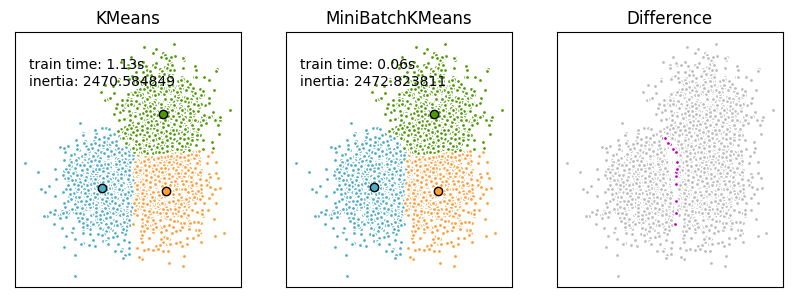

In [388]:
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets import make_blobs

# #############################################################################
# Generate sample data
np.random.seed(0)

batch_size = 45
centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)

# #############################################################################
# Compute clustering with Means

k_means = KMeans(init='k-means++', n_clusters=3, n_init=10)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0

# #############################################################################
# Compute clustering with MiniBatchKMeans

mbk = MiniBatchKMeans(init='k-means++', n_clusters=3, batch_size=batch_size,
                      n_init=10, max_no_improvement=10, verbose=0)
t0 = time.time()
mbk.fit(X)
t_mini_batch = time.time() - t0

# #############################################################################
# Plot result

fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

# We want to have the same colors for the same cluster from the
# MiniBatchKMeans and the KMeans algorithm. Let's pair the cluster centers per
# closest one.
k_means_cluster_centers = k_means.cluster_centers_
order = pairwise_distances_argmin(k_means.cluster_centers_,
                                  mbk.cluster_centers_)
mbk_means_cluster_centers = mbk.cluster_centers_[order]

k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers)

# KMeans
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8,  'train time: %.2fs\ninertia: %f' % (
    t_batch, k_means.inertia_))

# MiniBatchKMeans
ax = fig.add_subplot(1, 3, 2)
for k, col in zip(range(n_clusters), colors):
    my_members = mbk_means_labels == k
    cluster_center = mbk_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('MiniBatchKMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8, 'train time: %.2fs\ninertia: %f' %
         (t_mini_batch, mbk.inertia_))

# Initialise the different array to all False
different = (mbk_means_labels == 4)
ax = fig.add_subplot(1, 3, 3)

for k in range(n_clusters):
    different += ((k_means_labels == k) != (mbk_means_labels == k))

identic = np.logical_not(different)
ax.plot(X[identic, 0], X[identic, 1], 'w',
        markerfacecolor='#bbbbbb', marker='.')
ax.plot(X[different, 0], X[different, 1], 'w',
        markerfacecolor='m', marker='.')
ax.set_title('Difference')
ax.set_xticks(())
ax.set_yticks(())


### Clustering Jerarquico

El análisis de conglomerados jerárquicos es una familia general de los algoritmos de agrupamiento que construyen conglomerados anidados fusionándolos o dividiéndolos sucesivamente. Esta jerarquía de conglomerados se representa como un árbol (o dendrograma). La raíz del árbol es el conglomerado único que reúne todas las muestras, siendo las hojas los conglomerados con una sola muestra.

El objeto `AgglomerativeClustering` realiza un análisis de conglomerados jerárquicos utilizando un enfoque ascendente: cada observación comienza en su propio conglomerado y los conglomerados se fusionan sucesivamente. El criterio de enlazamiento determina la métrica utilizada para la estrategia de fusión:



**Ward** minimiza la suma de las diferencias al cuadrado dentro de todos los conglomerados. Se trata de un enfoque de minimización de la varianza y, en este sentido, es similar a la función objetivo de k-medias pero abordada con un enfoque jerárquico aglomerativo.

**Máximo** o **enlazamiento completo** minimiza la distancia máxima entre las observaciones de pares de conglomerados.

**Enlazamiento promedio** minimiza el promedio de las distancias entre todas las observaciones de pares de conglomerados.

El **enlazamiento simple** minimiza la distancia entre las observaciones más cercanas de los pares de conglomerados.

`AgglomerativeClustering` también puede escalar a un gran número de muestras cuando se utiliza conjuntamente con una matriz de conectividad, pero es computacionalmente costoso cuando no se añaden restricciones de conectividad entre las muestras: considera en cada paso todas las fusiones posibles.



#### Ejemplo

Este ejemplo muestra las características de diferentes métodos de enlazamiento para el agrupamiento jerárquico en conjuntos de datos «interesantes» pero todavía en 2D.

Las principales observaciones que hay que hacer son:

el enlazamiento simple es rápido y puede funcionar bien con datos no globulares, pero funciona mal en presencia de ruido.

el enlazamiento promedio y completo funciona bien en los conglomerados globulares limpiamente separados, pero tiene resultados mixtos en los demás casos.

Ward es el método más eficaz para los datos ruidosos.

Si bien estos ejemplos permiten intuir los algoritmos, esta intuición podría no aplicarse a datos de dimensiones muy altas.



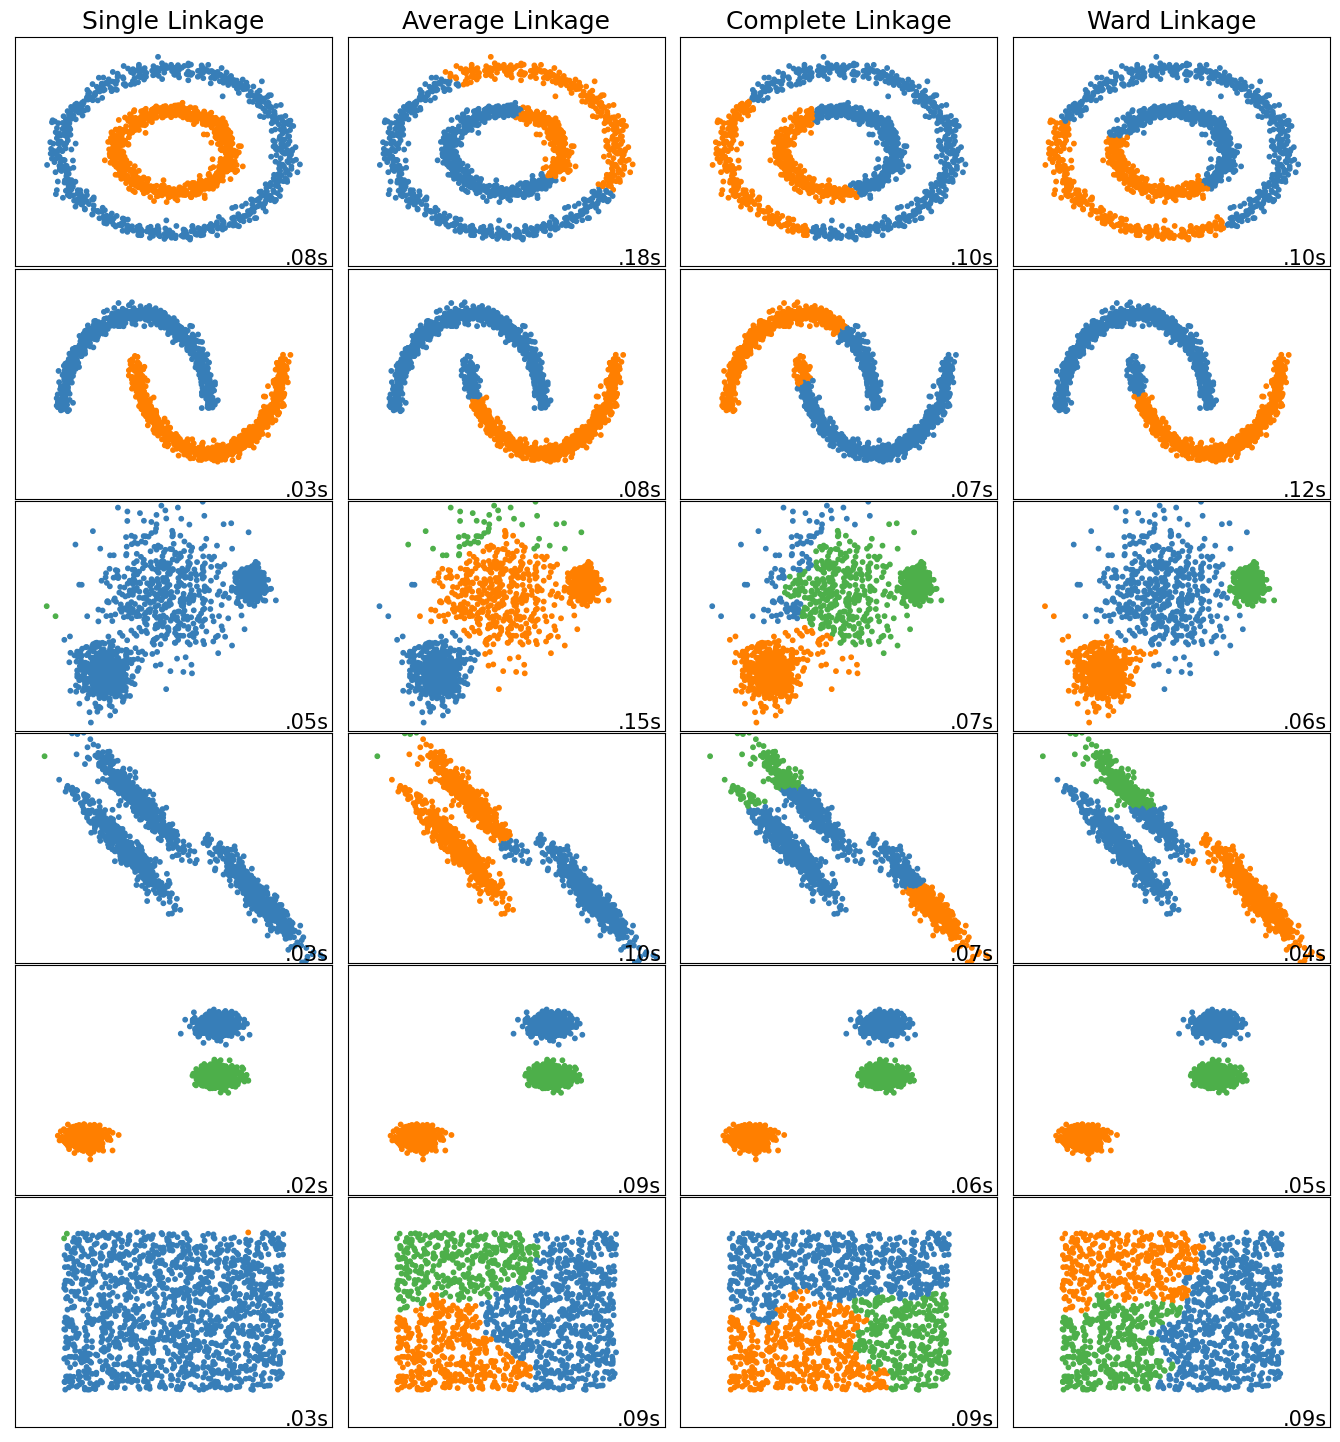

In [389]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

plt.figure(figsize=(9 * 1.3 + 2, 14.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'n_neighbors': 10,
                'n_clusters': 3}

datasets = [
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (varied, {'n_neighbors': 2}),
    (aniso, {'n_neighbors': 2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # ============
    # Create cluster objects
    # ============
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward')
    complete = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='complete')
    average = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='average')
    single = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='single')

    clustering_algorithms = (
        ('Single Linkage', single),
        ('Average Linkage', average),
        ('Complete Linkage', complete),
        ('Ward Linkage', ward),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

#### Segundo Ejemplo: Diferentes agrupamientos aglomerativos en una incrustación 2D de dígitos
Una ilustración de varias opciones de enlazamiento para el agrupamiento aglomerativo en una incrustación 2D del conjunto de datos de dígitos.

El objetivo de este ejemplo es mostrar intuitivamente cómo se comportan las métricas, y no encontrar buenos conglomerados para los dígitos. Por eso el ejemplo funciona en una incrustación 2D.

Lo que este ejemplo nos muestra es el comportamiento «rico que se enriquece» del agrupamiento aglomerativo que tiende a crear tamaños de conglomerados desiguales. Este comportamiento es pronunciado para la estrategia de enlazamiento promedio, que termina con un par de conglomerados únicos, mientras que en el caso de la vinculación única obtenemos un único conglomerado central con todos los demás conglomerados extraídos de puntos de ruido alrededor de los bordes.

Computing embedding
Done.
ward :	0.02s
average :	0.01s
complete :	0.02s
single :	0.01s


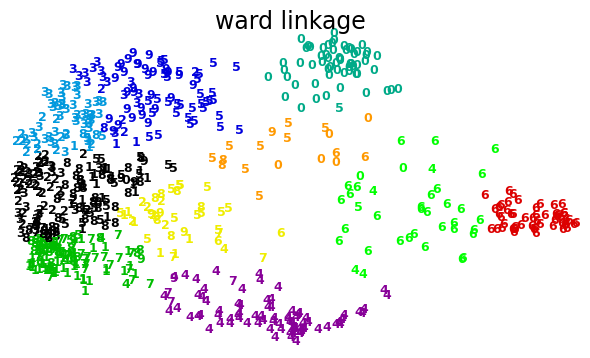

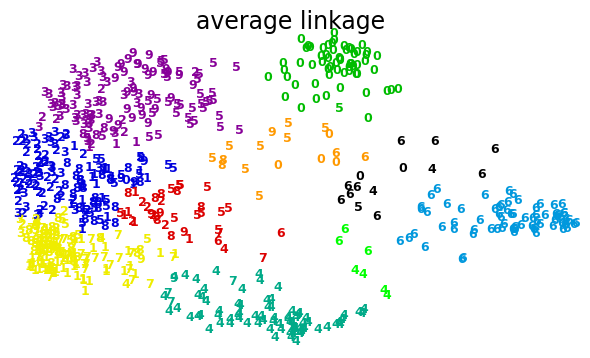

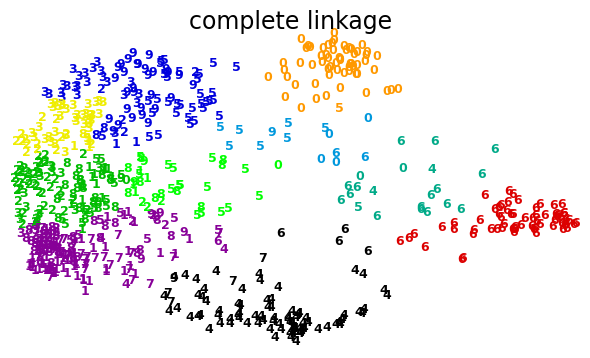

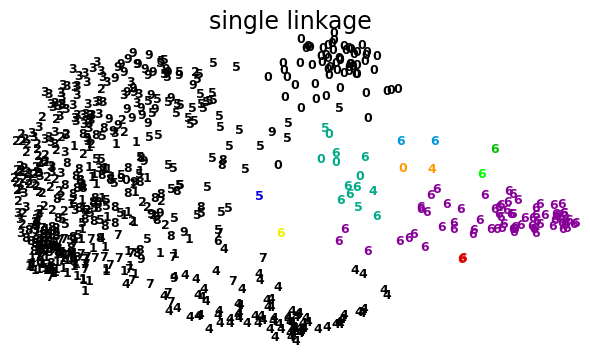

In [2]:
from time import time

import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import manifold, datasets

X, y = datasets.load_digits(return_X_y=True)
X,X_rem,y,y_rem = train_test_split(X, y, test_size=0.8)
n_samples, n_features = X.shape

np.random.seed(0)

def nudge_images(X, y):
    # Having a larger dataset shows more clearly the behavior of the
    # methods, but we multiply the size of the dataset only by 2, as the
    # cost of the hierarchical clustering methods are strongly
    # super-linear in n_samples
    shift = lambda x: ndimage.shift(x.reshape((8, 8)),
                                  .3 * np.random.normal(size=2),
                                  mode='constant',
                                  ).ravel()
    X = np.concatenate([X, np.apply_along_axis(shift, 1, X)])
    Y = np.concatenate([y, y], axis=0)
    return X, Y


X, y = nudge_images(X, y)


#----------------------------------------------------------------------
# Visualize the clustering
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#----------------------------------------------------------------------
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)


plt.show()

#### Visualización de las Jerarquías

Es posible visualizar el árbol que representa la fusión jerárquica de conglomerados como un dendrograma. La inspección visual a menudo puede ser a menudo útil para comprender la estructura de los datos, aunque más en el caso de tamaños de muestra pequeños.
Este ejemplo gráfica el dendrograma correspondiente de un agrupamieto jerárquico utilizando AgglomerativeClustering y el método dendrogram disponible en scipy.



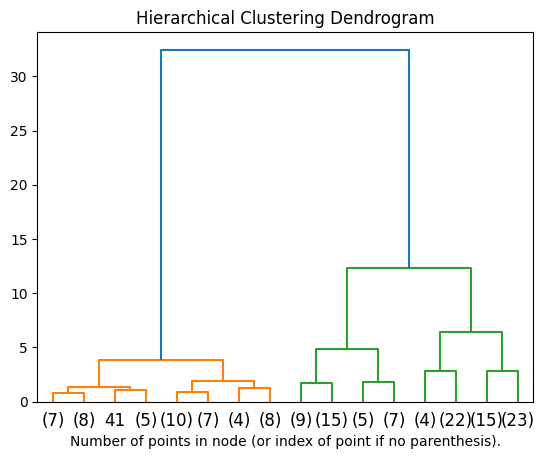

In [394]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### DBSCAN


"Density-Based Spatial Clustering of Applications with Noise" o Clustering espacial basdo en densidad de aplicaciones con ruido, es un algoritmo de agrupamiento de dato. El algoritmo se basa en densidad porque encuentra un número de grupos o clusters comenzando por una estimación de la distribución de densidad de los nodos correspondientes.

El funcionamiento del algoritmo se basa en clasificar las observaciones en tres tipos:

* **Puntos núcleo:** un punto es un punto núcleo si al menos $m$ puntos están a una distancia $\varepsilon$ de él y, esos puntos son directamente alcanzables desde él.
* **Puntos alcanzables:** Un punto es alcanzable desde un punto núcleo si existe una secuencia de puntos donde cada punto en la secuencia es directamente alcanzable desde el anterior; es decir, todos los puntos de la secuencia deben ser punto núcle, con la posible excepción del último punto.
* **Ruido:** Cualquier punto que no sea alcanzable desde cualquier otro punto es considerado ruido.


Si un punto es un punto núcleo, este forma un cluster junto a otros puntos (núcleo o no) que sean alcanzables desde él. Cada cluster contiene al menos un punto núcleo. Los puntos no núcleos alcanzables pueden pertenecer a un cluster pero actúan como una barrera puesto que no es posible alcanzar más puntos desde estos.

Una ventaja de DBSCAN es que también permite gestionar los valores atípicos o las anomalías. Por tanto, es necesario definir dos datos antes de utilizar DBSCAN: ¿Qué distancia $\varepsilon$ hay que determinar para cada observación la $\varepsilon$-vecindad? ¿Cuál es el número mínimo de vecinos necesario para considerar una observación como una observación central? Estos dos datos son facilitados libremente por el usuario.

![img](https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/400px-DBSCAN-Illustration.svg.png)

#### Ventajas
1. DBSCAN no necesita de la especificación del número de clusters deseado como lo requiere k-means.
2. DBSCAN puede encontrar clusters con formas geométricas arbitrarias. Puede incluso hallar un cluster completamente rodeado (pero no conectado) de otro cluster distinto. Debido al parámetro MinPts, se reduce el efecto single-link (clusters diferentes pueden conectarse mediante una delgada línea de puntos).
3. DBSCAN tiene noción del ruido, y es robusto detectando outliers.
4. DBSCAN requiere solo de dos parámetros y no es susceptible al orden en que se encuentren los puntos dentro de la base de datos. (Sin embargo, los puntos de las fronteras de dos clusters diferentes pueden pertenecer a uno u otro cluster si el orden de los puntos en la base de datos se cambia, y la asignación del cluster es única solo en isomorfismos.)


#### Deventajas

1. DBSCAN no es enteramente determinista: los puntos borde que son alcanzables desde más de un cluster pueden etiquetarse en cualquiera de estos. Afortunadamente, esta situación no es usual, y tiene un impacto pequeño sobre el cluster: en los puntos núcleo y ruidosos, DBSCAN es determinista. DBSCAN*4​ es una variación que trata los puntos borde como ruido, y así logra un resultado completamente determinista, así como una interpretación estadística de las componentes densamente conectadas más consistente.
2. La calidad de DBSCAN depende de la noción de distancia (distance measure) usada en la función regionQuery(P,$e$). La distancia más usada es la distancia euclidiana. Especialmente para los datos de alta dimensión, este indicador es inútil debido a la llamada "maldición de dimensionalidad", por lo que es difícil encontrar un valor adecuado para $e$. Este efecto, sin embargo, también está presente en cualquier otro algoritmo basado en la distancia euclidiana.
3. DBSCAN no puede agrupar conjuntos de datos bien con grandes diferencias en las densidades, ya que la combinación MinPts-$e$ no se puede escoger adecuadamente para todos los grupos.

El algoritmo DBSCAN considera los conglomerados como áreas de alta densidad separadas por áreas de baja densidad. Debido a esta visión bastante genérica, los conglomerados encontrados por DBSCAN pueden tener cualquier forma, a diferencia de k-medias, que asume que los conglomerados tienen forma convexa. El componente central del DBSCAN es el concepto de *muestras principales*, que son muestras que se encuentran en zonas de alta densidad. Un conglomerado es, por tanto, un conjunto de muestras principales, cada una de ellas cercana a la otra (medida por alguna distancia) y un conjunto de muestras no principales que están cerca de una muestra principal (pero que no son ellas mismas muestras principales). El algoritmo tiene dos parámetros, `min_samples` y `eps`, que definen formalmente lo que queremos decir cuando hablamos de *densidad*. Un `min_samples` más alto o un eps más bajo indican una mayor densidad necesaria para formar un conglomerado.

Más formalmente, definimos una muestra principal como una muestra en el conjunto de datos de forma tal que existen `min_samples` otras muestras dentro de una distancia de `eps`, que se definen como *vecinos* de la muestra principal. Esto nos dice que la muestra principal se encuentra en un área densa del espacio vectorial. Un conglomerado es un conjunto de muestras principales que puede construirse tomando recursivamente una muestra principal, encontrando a todos sus vecinos que son muestras principales, y así sucesivamente. Un conglomerado también tiene un conjunto de muestras no principales, que son muestras vecinas de una muestra principal en el conglomerado pero no son en sí mismas muestras principales. Intuitivamente, estas muestras están en los márgenes de un conglomerado.

Cualquier muestra principal forma parte de un conglomerado, por definición. Cualquier muestra que no es una muestra principal, y que esté al menos `eps` de distancia de cualquier muestra principal, es considerado un valor atípico por el algoritmo.

Mientras que el parámetro `min_samples` controla principalmente la tolerancia del algoritmo al ruido (en conjuntos de datos ruidosos y grandes puede ser deseable aumentar este parámetro), el parámetro `eps` es *crucial para elegir adecuadamente* para el conjunto de datos y la función de distancia y normalmente no puede dejarse en el valor por defecto. Controla el vecindario local de los puntos. Cuando se elige demasiado pequeño, la mayoría de los datos no serán conglomerados en absoluto (y serán etiquetados como `-1` para el «ruido»). Cuando se elige demasiado grande, hace que los conglomerados cercanos se fusionen en un conglomerado, y finalmente, todo el conjunto de datos será devuelto como un solo conglomerado. Algunas heurísticas para elegir este parámetro han sido discutidas en la literatura, por ejemplo, basándose en una curvatura en el gráfico de distancias del vecino más cercano (como se discute en las referencias más abajo).

En la figura de abajo, el color indica la pertenencia a un conglomerado, los círculos grandes indican las muestras principales encontradas por el algoritmo. Los círculos más pequeños son muestras no principales que siguen formando parte del conglomerado. Además, los valores atípicos se indican con puntos negros abajo.

#### Ejemplo
Encuentra muestras centrales de alta densidad y expande los conglomerados a partir de ellas.

In [392]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)


Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


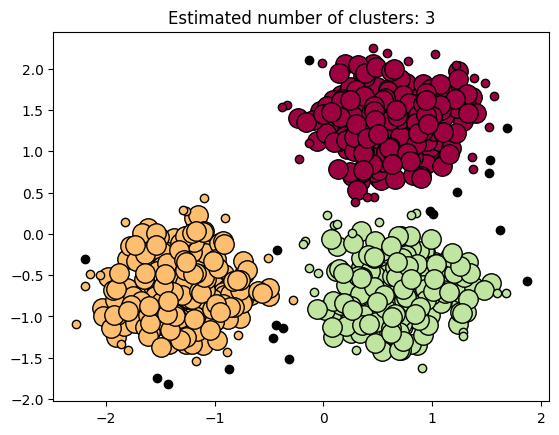

In [393]:
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()